##### Teste Técnico | Data Scientist - Lopes

##### Contexto
O presente problema se refere aos dados de vinhos portugueses
"Vinho Verde", que possuem variantes de vinho branco e tinto.
Devido a questões de privacidade, apenas variáveis
físico-químicas (input) e sensoriais (output) estão disponíveis (por
exemplo, não há dados sobre tipo de uva, marca do vinho, preço
de venda, etc).

##### Objetivo
Criar um modelo para estimar a qualidade do vinho.
Informação sobre os atributos
Variáveis input (baseado em testes físico-químicos):
1. Tipo
2. Acidez fixa
3. Volatilidade da acidez
4. Ácido cítrico
5. Açúcar residual
6. Cloretos
7. Dióxido de enxofre livre
8. Dióxido de enxofre total
9. Densidade
10. pH
11. Sulfatos
12. Álcool Variável output (baseado em dado sensorial):
13. Qualidade (score entre 0 and 10)

##### Execução
1. Faça uma análise exploratória para avaliar a consistência dos dados e identificar possíveis variáveis que impactam na qualidade do vinho.
2. Para a realização deste teste você pode utilizar o software de sua preferência (Python ou R), só pedimos que compartilhe conosco o código fonte (utilizando um repositório git). Além disso, inclua um arquivo README.md onde você deve cobrir as respostas para os 5 pontos abaixo:
<br>a. Como foi a definição da sua estratégia de modelagem?</br>
<br>b. Como foi definida a função de custo utilizada?</br>
<br>c. Qual foi o critério utilizado na seleção do modelo final?</br>
<br>d. Qual foi o critério utilizado para validação do modelo? Por que escolheu utilizar este método?</br>
<br>e. Quais evidências você possui de que seu modelo é suficientemente bom?</br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#fazendo a leitura do dataset
#https://drive.google.com/file/d/1-oG5-kBt9xQ3Li4PEexpiA9_7RZhRM1f
vinhos = pd.read_csv('winequality.csv', sep=';')

In [4]:
#verificando início dos dados
vinhos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


###### Dicionário de Dados
<br>type	               -> tipo</br>
<br>fixed acidity	       -> acidez fixa</br>
<br>volatile acidity	   -> acidez volátil</br>
<br>citric acid	           -> ácido cítrico</br>
<br>residual sugar	       -> açúcar residual</br>
<br>chlorides	           -> cloretos</br>
<br>free sulfur dioxide	   -> dióxido de enxofre livre</br>
<br>total sulfur dioxide   -> dióxido de enxofre total</br>
<br>density	               -> densidade</br>
<br>pH	                   -> pH</br>
<br>sulphates	           -> sulfatos</br>
<br>quality                -> qualidade</br>

In [25]:
#verificando a sumarização estatistica
vinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,9.000000


In [5]:
#verificando se há valores nulos - Não Há
vinhos.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
#fazendo contagem conforme a qualidade
vinhos['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [10]:
#verificando a qualidade míima
vinhos.quality.min()

3

In [11]:
#verificando a qualidade máxima
vinhos.quality.max()

9

In [17]:
#listando o nome das variáveis
vinhos.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
#verificando informações e tipos de variáveis
vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 660.0+ KB


In [27]:
#Substituindo valores das variável categórica
vinhos['type'] = vinhos['type'].replace('Red', 0)
vinhos['type'] = vinhos['type'].replace('White', 1)

In [28]:
#verificando informações e tipos de variáveis após alteração do valor categórico type
vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 660.0+ KB


In [29]:
#listando dataframe alterado
vinhos

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
#verificando as correlações entre variáveis
vinhos.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.159212,-0.252700,0.299568,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.030868,0.261454,0.225984,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.057748,-0.329808,0.056197,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.175741,-0.267320,-0.185927,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.061628,0.044708,0.395593,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.029640,-0.145854,-0.188457,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.030990,-0.238413,-0.275727,-0.041385
density,0.159212,0.030868,0.057748,0.175741,0.061628,0.029640,0.030990,1.000000,-0.052710,0.062810,-0.029499
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,-0.052710,1.000000,0.192123,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.062810,0.192123,1.000000,0.038485


In [9]:
#verificando a correlação entre quality e as outras
for x in vinhos.columns:
    print(vinhos[[x,'quality']].corr())
    print()

         quality
quality      1.0

               fixed acidity   quality
fixed acidity       1.000000 -0.076743
quality            -0.076743  1.000000

                  volatile acidity   quality
volatile acidity          1.000000 -0.265699
quality                  -0.265699  1.000000

             citric acid   quality
citric acid     1.000000  0.085532
quality         0.085532  1.000000

                residual sugar  quality
residual sugar         1.00000 -0.03698
quality               -0.03698  1.00000

           chlorides   quality
chlorides   1.000000 -0.200666
quality    -0.200666  1.000000

                     free sulfur dioxide   quality
free sulfur dioxide             1.000000  0.055463
quality                         0.055463  1.000000

                      total sulfur dioxide   quality
total sulfur dioxide              1.000000 -0.041385
quality                          -0.041385  1.000000

          density   quality
density  1.000000 -0.029499
quality -0.029499  1

(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

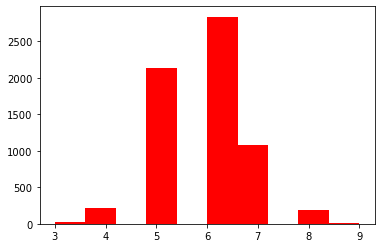

In [13]:
#verificando a distribuição do campo quality - qualidade
plt.hist(vinhos.quality,10,density=False, facecolor='red')

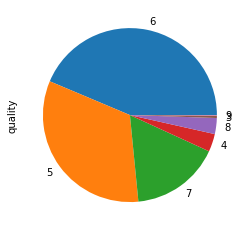

In [14]:
vinhos["quality"].value_counts().plot.pie()

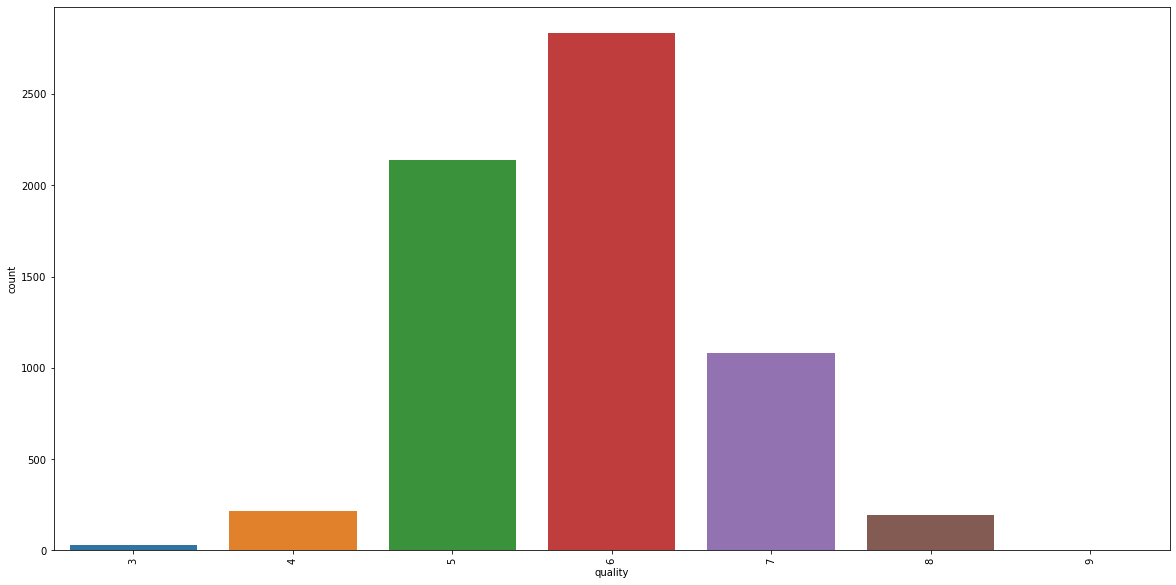

In [15]:
#verificando a qualidade em um gráfico mais apresentável
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='quality', data=vinhos)
ax.set_xticklabels(rotation=90, labels=ax.get_xticklabels())
ax

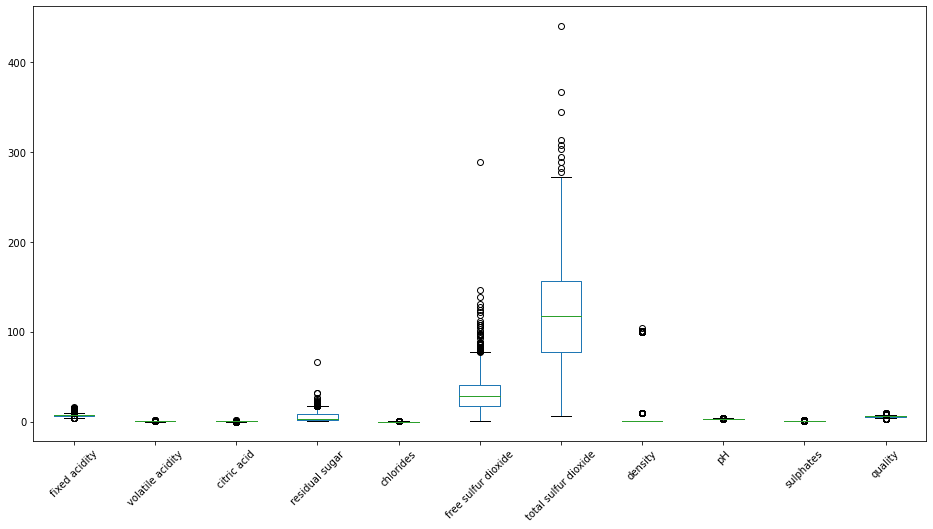

In [16]:
# plota o boxplot de cada coluna do dataframe
vinhos.plot.box(figsize=(16, 8))
# apenas ajusta a rotação dos marcadores do eixo x
plt.xticks(rotation=45)
plt.show()

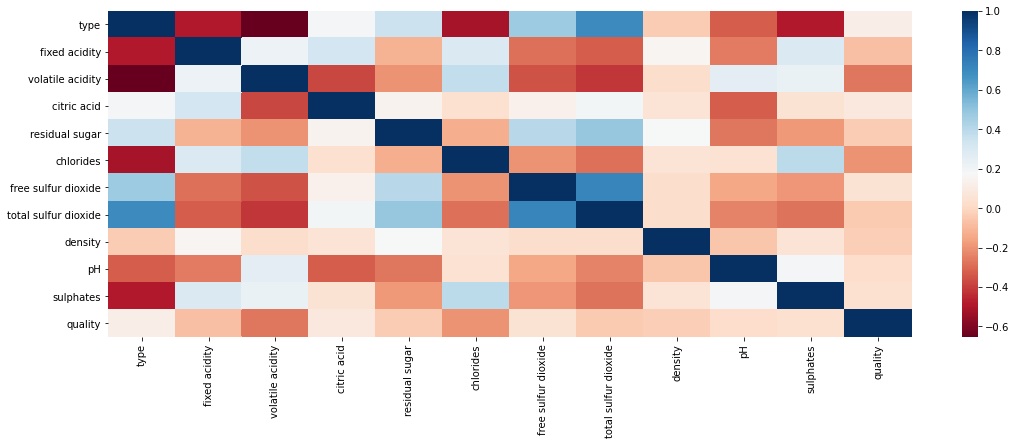

In [30]:
# calcula as correlacoes
corr = vinhos.corr()
# Mapa de calor com as correlacoes entre as variaveis
plt.subplots(figsize=(18,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu")
plt.show()

C:\Users\AL\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AL\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AL\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AL\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AL\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


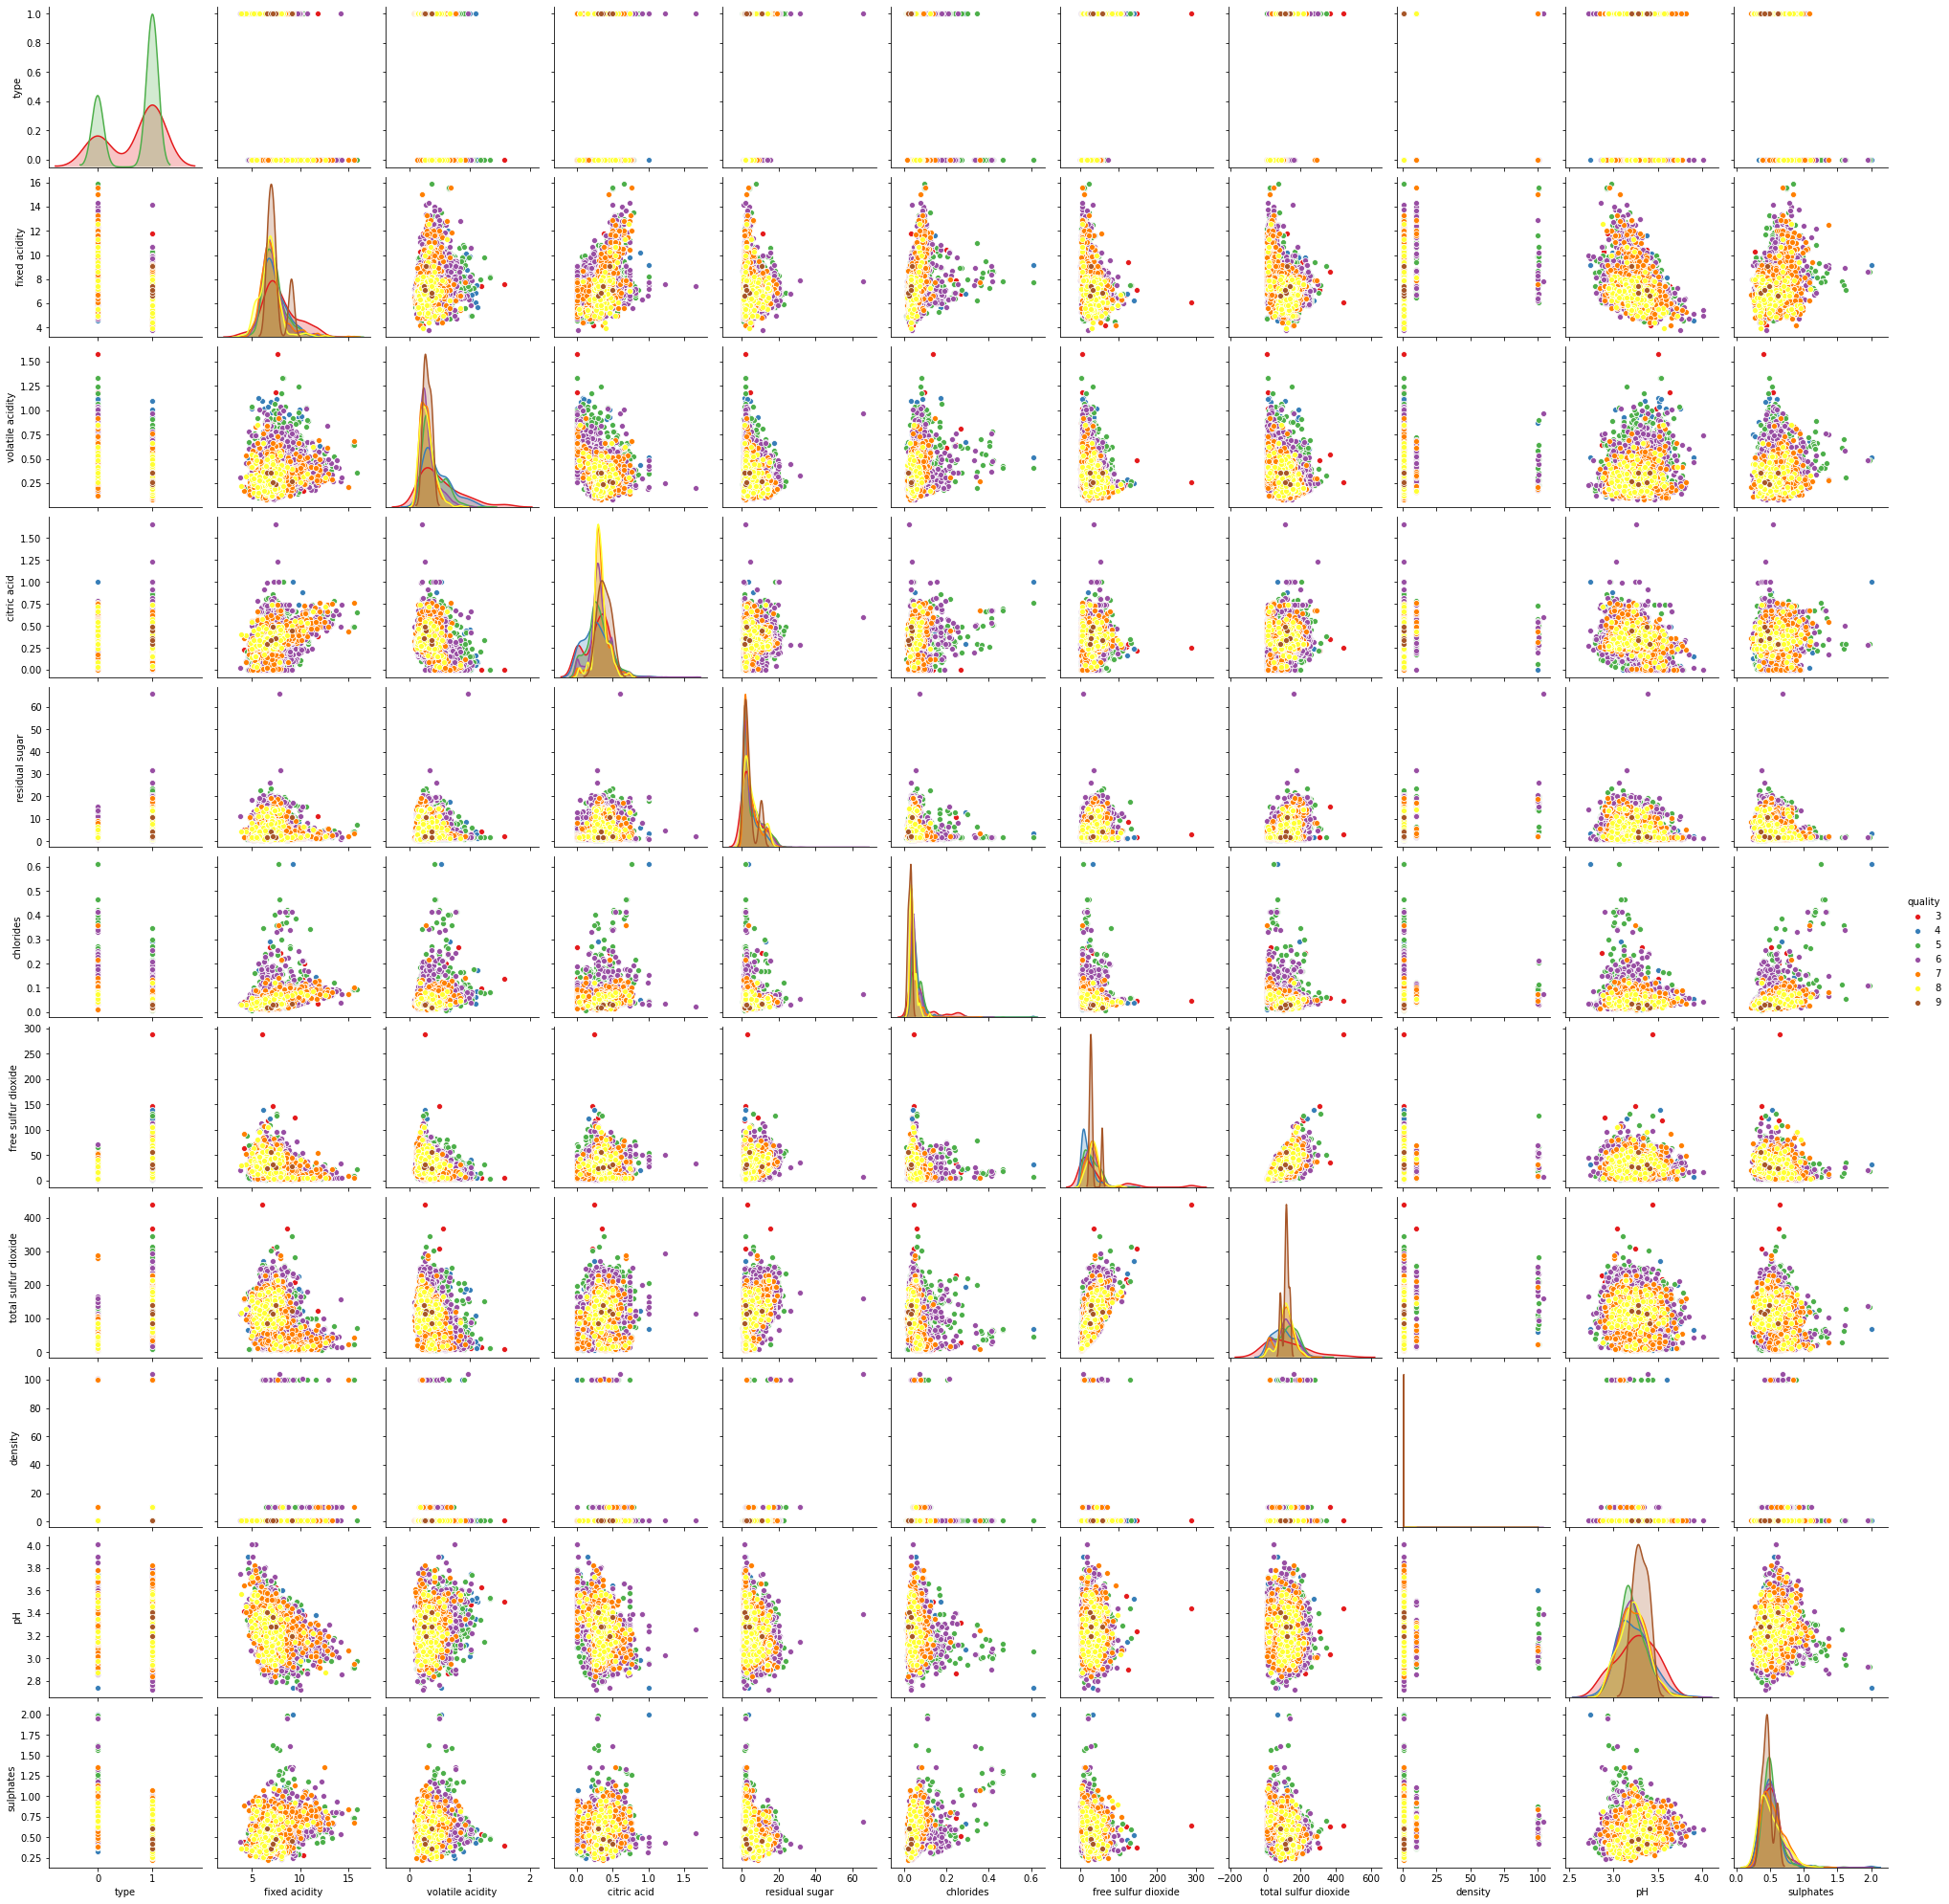

In [31]:
#verificando as correlações de forma visual
sns.pairplot(vinhos,hue='quality',palette='Set1')

In [33]:
#existem valores atípicos
vinhos.alcohol.unique()

array(['8.8', '9.5', '10.1', '9.9', '9.6', '11', '12', '9.7', '10.8',
       '12.4', '11.4', '12.8', '11.3', '10.5', '9.3', '10', '10.4',
       '11.6', '12.3', '10.2', '9', '11.2', '8.6', '9.4', '9.8', '11.7',
       '10.9', '9.1', '8.9', '10.3', '12.6', '10.7', '12.7', '10.6',
       '9.2', '8.7', '11.5', '11.8', '12.1', '11.1', '8.5', '12.5',
       '11.9', '12.2', '12.9', '13.9', '14', '13.5', '13.3', '13.2',
       '13.7', '13.4', '13', '8', '13.1', '8.0', '13.6', '8.4', '14.2',
       '11.94', '128.933.333.333.333', '114.666.666.666.667', '10.98',
       '100.333.333.333.333', '114.333.333.333.333',
       '105.333.333.333.333', '953.333.333.333.333',
       '109.333.333.333.333', '113.666.666.666.667',
       '113.333.333.333.333', '110.666.666.666.667',
       '973.333.333.333.333', '11.05', '9.75', '11.35', '9.55', '10.55',
       '11.45', '14.05', '123.333.333.333.333', '12.75', '13.8', '12.15',
       '13.05', '112.666.666.666.667', '105.666.666.666.667',
       '117.333.333

In [34]:
#função para deletar dízimas
def ajuste(valor):
    if len(valor.split('.')) > 2:
        resultado = valor.split('.')[0:2]  
        return resultado[0] + '.' + resultado[1] 
    else:
        return valor

In [36]:
#Chamando a função
vinhos.alcohol = vinhos.alcohol.apply(ajuste)

In [54]:
vinhos.alcohol = pd.to_numeric(vinhos.alcohol)

In [55]:
vinhos.alcohol.unique()

array([  8.8  ,   9.5  ,  10.1  ,   9.9  ,   9.6  ,  11.   ,  12.   ,
         9.7  ,  10.8  ,  12.4  ,  11.4  ,  12.8  ,  11.3  ,  10.5  ,
         9.3  ,  10.   ,  10.4  ,  11.6  ,  12.3  ,  10.2  ,   9.   ,
        11.2  ,   8.6  ,   9.4  ,   9.8  ,  11.7  ,  10.9  ,   9.1  ,
         8.9  ,  10.3  ,  12.6  ,  10.7  ,  12.7  ,  10.6  ,   9.2  ,
         8.7  ,  11.5  ,  11.8  ,  12.1  ,  11.1  ,   8.5  ,  12.5  ,
        11.9  ,  12.2  ,  12.9  ,  13.9  ,  14.   ,  13.5  ,  13.3  ,
        13.2  ,  13.7  ,  13.4  ,  13.   ,   8.   ,  13.1  ,  13.6  ,
         8.4  ,  14.2  ,  11.94 , 128.933, 114.666,  10.98 , 100.333,
       114.333, 105.333, 953.333, 109.333, 113.666, 113.333, 110.666,
       973.333,  11.05 ,   9.75 ,  11.35 ,   9.55 ,  10.55 ,  11.45 ,
        14.05 , 123.333,  12.75 ,  13.8  ,  12.15 ,  13.05 , 112.666,
       105.666, 117.333,  11.75 ,  10.65 , 109.666, 101.333,  10.15 ,
       104.666, 116.333,  12.25 ,  11.85 ,  11.65 ,  13.55 , 131.333,
        11.95 , 120.

In [21]:
# deletei a coluna alcohol porque tinha
#vinhos.drop(['alcohol'], axis=1, inplace=True)

In [69]:
#contando as linhas com dados atípicos - 40 linhas
vinhos.loc[vinhos['alcohol'] >= 15].count()

type                    40
fixed acidity           40
volatile acidity        40
citric acid             40
residual sugar          40
chlorides               40
free sulfur dioxide     40
total sulfur dioxide    40
density                 40
pH                      40
sulphates               40
alcohol                 40
quality                 40
dtype: int64

In [70]:
# deletei a coluna alcohol porque tinha
vinhos.drop(['alcohol'], axis=1, inplace=True)

##### Treinando o Modelo

In [71]:
#importando bilbioteca do modelo
from sklearn.model_selection import train_test_split

In [72]:
X = vinhos.drop(['quality'], axis=1) 
y = vinhos['quality']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [74]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71


##### Aplicando Modelo

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dtree = DecisionTreeClassifier()

In [77]:
vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 609.2 KB


In [78]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

##### Score e Avaliação

In [79]:
predictions = dtree.predict(X_test)

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.24      0.25      0.24        61
           5       0.62      0.63      0.63       639
           6       0.64      0.64      0.64       874
           7       0.49      0.49      0.49       304
           8       0.41      0.34      0.37        61
           9       0.00      0.00      0.00         3

    accuracy                           0.59      1950
   macro avg       0.34      0.34      0.34      1950
weighted avg       0.58      0.59      0.59      1950



In [82]:
print(confusion_matrix(y_test,predictions))

[[  0   1   4   2   0   1   0]
 [  0  15  26  15   5   0   0]
 [  1  26 404 183  24   1   0]
 [  1  18 179 558 106  12   0]
 [  0   2  38 100 148  15   1]
 [  0   0   2  18  20  21   0]
 [  0   0   0   1   1   1   0]]


###### conforme previsto a acurácia foi baixa, pois não há uma forte correlaçõ positiva entre as variávels, o que mais incluencia pela análise é o dióxido de enxofre